In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
data = pd.read_csv(r"C:\Users\Carlo\Desktop\Todo el proyecto\Proyecto\DATA TOTAL\Total_Carlos_++.csv")

In [12]:
data

Name  Goals  Big chances missed  Successful dribbles %  \
0       Ryan Manning   0.12                0.05                  58.14   
1     Oliver Norwood   0.04                0.02                  57.14   
2       Ross Stewart   0.77                0.46                  41.18   
3         Sam Tickle   0.00                0.00                 100.00   
4      Gustavo Hamer   0.22                0.15                  56.79   
...              ...    ...                 ...                    ...   
7965    Harvey White   0.00                0.00                   0.00   
7966  Conor Coventry   0.00                0.00                   0.00   
7967    Connor Ronan   0.00                0.00                 100.00   
7968      David Ozoh   0.00                0.00                   0.00   
7969   George Abbott   0.00                0.00                   0.00   

      Total shots  Headed goals  Set piece conversion %  Tackles  \
0            1.35          0.00                     0.0     1.95   
1            1.09          0.00                     0.2     2.41   
2            3.54          0.15                     0.0     1.00   
3            0.00          0.00                     0.0     0.00   
4            2.56          0.00                     0.0     2.63   
...           ...           ...                     ...      ...   
7965         0.00          0.00                     0.0     0.00   
7966         0.00          0.00                     0.0     0.00   
7967         0.00          0.00                     0.0     0.00   
7968         0.00          0.00                     0.0     0.00   
7969         0.00          0.00                     0.0     0.00   

      Interceptions  Penalty committed  Clearances  Errors lead to goal  \
0              1.26                0.0        1.00                 0.02   
1              1.67                0.0        1.72                 0.00   
2              0.15                0.0        1.77                 0.00   
3              0.00                0.0        1.00                 0.00   
4              1.05                0.0        0.71                 0.02   
...             ...                ...         ...                  ...   
7965           0.00                0.0        0.00                 0.00   
7966           0.00                0.0        0.00                 0.00   
7967           0.00                0.0        0.00                 0.00   
7968           0.00                0.0        0.00                 0.00   
7969           1.00                0.0        0.00                 0.00   

      Dribbled past  Big chances created  Assists  Total passes  \
0              0.51                 0.33     0.23         52.77   
1              0.91                 0.20     0.11         53.76   
2              0.69                 0.08     0.23         25.85   
3              0.00                 0.00     0.00         30.00   
4              1.73                 0.39     0.24         45.20   
...             ...                  ...      ...           ...   
7965           1.00                 0.00     0.00          5.00   
7966           0.00                 0.00     0.00          0.00   
7967           0.00                 0.00     0.00          3.00   
7968           0.00                 0.00     0.00          3.00   
7969           0.00                 0.00     0.00          1.00   

      Accurate passes %  Accurate final third passes  Accurate long balls %  \
0                 81.84                        12.63                  38.79   
1                 78.33                        13.07                  48.65   
2                 68.75                         6.38                  65.00   
3                 70.00                         2.00                  35.71   
4                 72.58                        12.00                  49.84   
...                 ...                          ...                    ...   
7965              40.00                         1.0

In [4]:
# Reemplaza los valores infinitos con NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Luego reemplaza los valores NaN con 0
data = data.fillna(0)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

Name                              0
Goals                             0
Big chances missed                0
Successful dribbles %             0
Total shots                       0
Headed goals                      0
Set piece conversion %            0
Tackles                           0
Interceptions                     0
Penalty committed                 0
Clearances                        0
Errors lead to goal               0
Dribbled past                     0
Big chances created               0
Assists                           0
Total passes                      0
Accurate passes %                 0
Accurate final third passes       0
Accurate long balls %             0
Saves                             0
Clean sheets                      0
Penalties faced                   0
Penalties saved                   0
Goals conceded inside the box     0
Goals conceded outside the box    0
Yellow cards                      0
Red cards                         0
Aerial duels won %          

C:\Users\Carlo\AppData\Local\Temp\ipykernel_38960\2411817549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

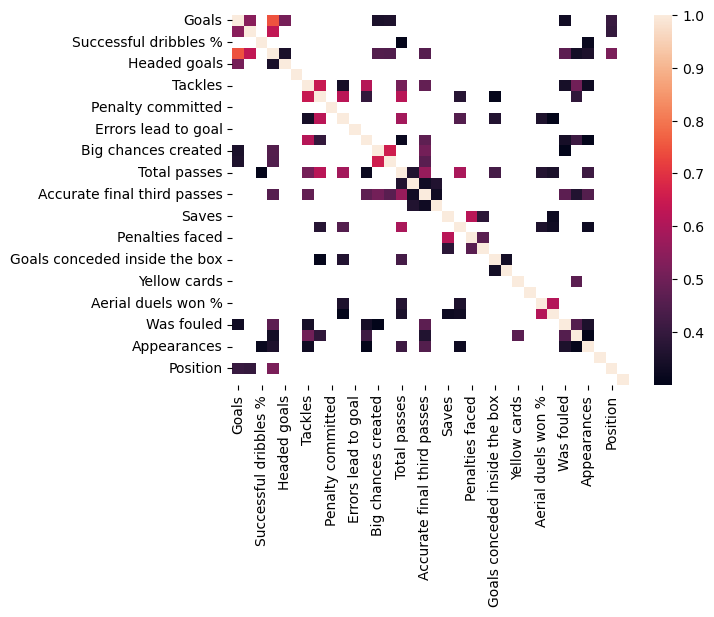

In [7]:
corr = data.corr()
correlation = corr[corr > 0.30]
sns.heatmap(correlation)

# Primera visualizaci√≥n 


La unica posicion que tiene una correlaci√≥n superior al 30% en relacion a las habilidades es la de delantero o eso se presume, ya que no tiene ningun tipo de relaci√≥n superior a el resto de habilidades expeto, las de un goleador.

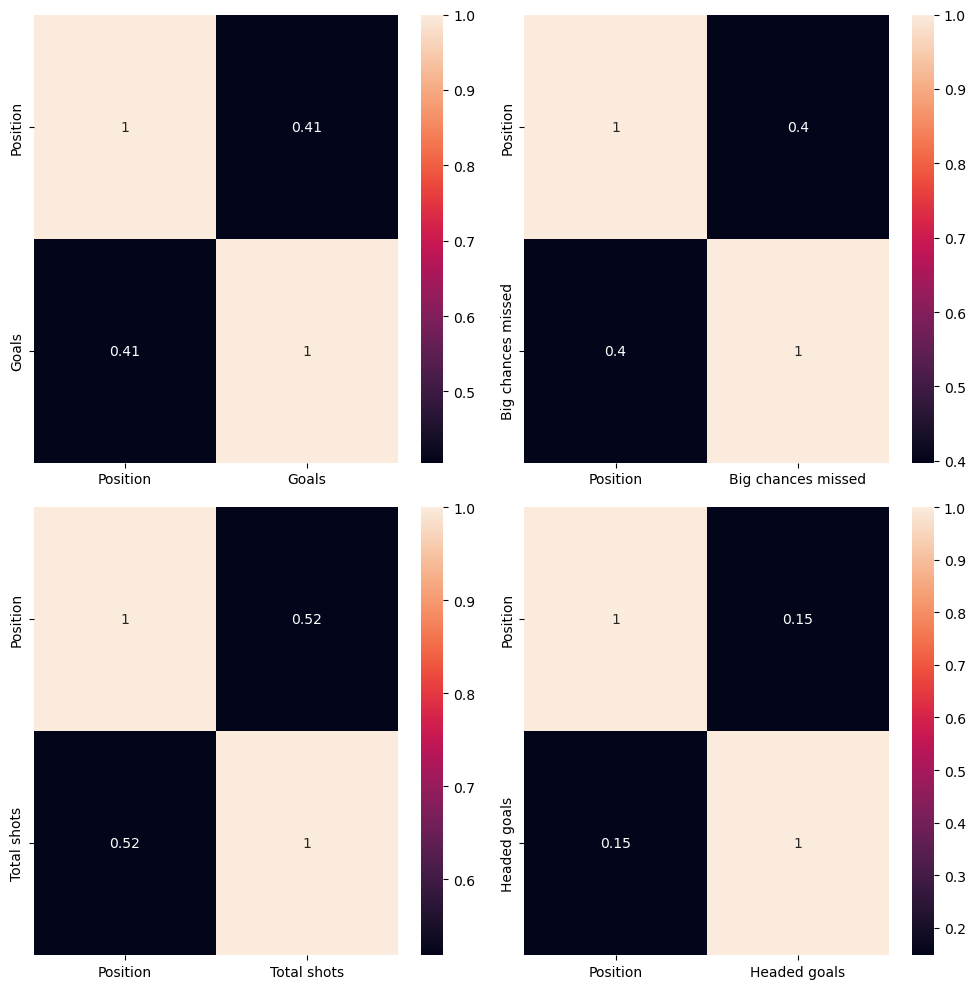

In [8]:
fig, axis = plt.subplots(2,2,figsize = (10, 10))
sns.heatmap(data[["Position", "Goals"]].corr(), annot = True, ax=axis[0, 0])
sns.heatmap(data[["Position", "Big chances missed"]].corr(), annot = True, ax = axis[0,1])
sns.heatmap(data[["Position", "Headed goals"]].corr(), annot = True, ax = axis[1,1])
sns.heatmap(data[["Position", "Total shots"]].corr(), annot = True, ax = axis[1,0])
plt.tight_layout()
plt.show()


In [9]:
data.isna().sum()

Name                              0
Goals                             0
Big chances missed                0
Successful dribbles %             0
Total shots                       0
Headed goals                      0
Set piece conversion %            0
Tackles                           0
Interceptions                     0
Penalty committed                 0
Clearances                        0
Errors lead to goal               0
Dribbled past                     0
Big chances created               0
Assists                           0
Total passes                      0
Accurate passes %                 0
Accurate final third passes       0
Accurate long balls %             0
Saves                             0
Clean sheets                      0
Penalties faced                   0
Penalties saved                   0
Goals conceded inside the box     0
Goals conceded outside the box    0
Yellow cards                      0
Red cards                         0
Aerial duels won %          

# Aplicaremos PCA observar si se pueden reducir la dimensionalidad de los datos

In [20]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

Columna_habilidades = data.columns.drop(["Name", "League"])

features = data[Columna_habilidades]

features['Level'] = features['Level'] * 50
features['Appearances'] = features['Appearances'] * 30


# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)

# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=6)  # Buscamos 6 vecinos porque uno de ellos ser√° el jugador mismo

# Ajusta el modelo a tus datos
model.fit(features_scaled)

# Define una funci√≥n para buscar jugadores similares
def buscar_jugadores_similares(nombre):
    jugador = data[data['Name'] == nombre]
    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        # Aseg√∫rate de escalar las caracter√≠sticas del jugador antes de pasarlas a kneighbors
        jugador_scaled = scaler.transform(jugador[features.columns])
        distancias, indices = model.kneighbors(jugador_scaled)
        return data.iloc[indices[0]][1:]  # Excluimos el primer resultado porque ser√° el jugador mismo


C:\Users\Carlo\AppData\Local\Temp\ipykernel_38960\2161826149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Level'] = features['Level'] * 50
C:\Users\Carlo\AppData\Local\Temp\ipykernel_38960\2161826149.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Appearances'] = features['Appearances'] * 30


In [19]:
# Ahora puedes buscar jugadores similares
pd.set_option('display.max_columns', None)
buscar_jugadores_similares('Anel Ahmedhod≈æiƒá')

Name  Goals  Big chances missed  Successful dribbles %  \
5564   Andrea Carboni   0.19                0.06                  72.73   
5003     Stefan Posch   0.20                0.07                  46.67   
202     Yuta Nakayama   0.14                0.21                  33.33   
79     Jonathan Panzo   0.03                0.03                  50.00   
1726  Nahuel Tenaglia   0.09                0.12                  43.24   

      Total shots  Headed goals  Set piece conversion %  Tackles  \
5564         0.75          0.13                     0.0     2.56   
5003         0.93          0.10                     0.0     2.70   
202          1.00          0.07                     0.0     1.14   
79           0.52          0.03                     0.0     1.55   
1726         1.00          0.06                     0.0     1.82   

      Interceptions  Penalty committed  Clearances  Errors lead to goal  \
5564           1.31                0.0        3.31                  0.0   
5003           1.17                0.0        2.00                  0.0   
202            0.93                0.0        2.50                  0.0   
79             1.72                0.0        2.90                  0.0   
1726           1.26                0.0        2.06                  0.0   

      Dribbled past  Big chances created  Assists  Total passes  \
5564           0.69                 0.06     0.06         48.69   
5003           1.03                 0.10     0.07         49.17   
202            0.50                 0.07     0.00         40.57   
79             0.34                 0.00     0.03         37.76   
1726           0.65                 0.03     0.03         24.09   

      Accurate passes %  Accurate final third passes  Accurate long balls %  \
5564              77.02                         6.94                  36.59   
5003              76.75                         7.20                  46.03   
202               79.40                         4.14                  45.07   
79                83.20                         4.79                  50.00   
1726              62.39                         4.47                  22.37   

      Saves  Clean sheets  Penalties faced  Penalties saved  \
5564    0.0          0.19              0.0              0.0   
5003    0.0          0.20              0.0              0.0   
202     0.0          0.29              0.0              0.0   
79      0.0          0.45              0.0              0.0   
1726    0.0          0.32              0.0              0.0   

      Goals conceded inside the box  Goals conceded outside the box  \
5564                           0.94                            0.13   
5003                           1.03                            0.10   
202                            0.93                            0.07   
79                             0.69                            0.03   
1726                           0.62                            0.09   

      Yellow cards  Red cards  Aerial duels won %  Total duels won %  \
5564          0.25        0.0               54.35              60.00   
5003          0.20        0.0               49.09              53.19   
202           0.14        0.0               65.52              54.39   
79            0.24        0.0               59.18              57.89   
1726          0.24        0.0               59.49              55.96   

      Was fouled  Fouls  Appearances  Age Range  Position        League  Level  
5564        0.63   1.00           16          1         2       Serie B      2  
5003        0.93   1.57           30          2         2       Serie A      1  
202         0.43   1.00           14          2         2  Championship      2  
79          0.45   0.93           29          1         2  Championship      2  
1726        0.88   1.21           34          2         2     La Liga 2      2

S√≠, definitivamente puedes darle m√°s importancia a ciertas caracter√≠sticas en tu modelo. Esto se conoce como ponderaci√≥n de caracter√≠sticas y puede ser especialmente √∫til si consideras que algunas caracter√≠sticas son m√°s importantes que otras para determinar la similitud entre los jugadores.

Una forma de hacerlo es multiplicar los valores de las caracter√≠sticas m√°s importantes por un factor antes de entrenar tu modelo. Aqu√≠ te muestro c√≥mo podr√≠as hacerlo:

# Supongamos que 'habilidad1' es una caracter√≠stica importante
data['habilidad1'] = data['habilidad1'] * 1.5

# Ahora 'habilidad1' tiene m√°s peso en tu modelo

Este c√≥digo multiplica todos los valores en la columna ‚Äòhabilidad1‚Äô por 1.5, lo que efectivamente le da m√°s peso a esa caracter√≠stica en tu modelo.

Otra opci√≥n ser√≠a utilizar un algoritmo que soporte la ponderaci√≥n de caracter√≠sticas directamente. Por ejemplo, muchos algoritmos de clasificaci√≥n en scikit-learn permiten pasar un par√°metro class_weight que puedes usar para especificar la importancia de cada caracter√≠stica.

Ten en cuenta que la ponderaci√≥n de caracter√≠sticas puede tener un impacto significativo en los resultados de tu modelo, por lo que deber√≠as hacerlo con cuidado y asegurarte de validar tu modelo despu√©s de cambiar los pesos. ¬°Espero que esto te ayude! üòä




-----------------------------------



Entiendo, quieres dar m√°s peso a 6 caracter√≠sticas espec√≠ficas sin eliminar las dem√°s. Una forma de hacerlo es escalar estas 6 caracter√≠sticas por un factor mayor que 1 antes de pasar los datos al algoritmo k-NN. Esto har√° que estas caracter√≠sticas tengan m√°s peso en el c√°lculo de la distancia. Aqu√≠ te dejo un ejemplo de c√≥mo podr√≠as hacerlo:

Python

# Supongamos que 'important_features' es una lista de las 6 caracter√≠sticas m√°s importantes
important_features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']

# Escala las caracter√≠sticas importantes
for feature in important_features:
    data[feature] *= importance_factor  # 'importance_factor' es el factor por el que quieres escalar las caracter√≠sticas importantes

# Luego, puedes seguir con tu c√≥digo para escalar todas las caracter√≠sticas y ajustar el modelo k-NN
C√≥digo generado por IA. Revisar y usar cuidadosamente. M√°s informaci√≥n sobre preguntas frecuentes.
Este c√≥digo multiplicar√° los valores de tus 6 caracter√≠sticas importantes por importance_factor, lo que efectivamente les dar√° m√°s peso en el c√°lculo de la distancia en el algoritmo k-NN.

Espero que esto te ayude. Si tienes m√°s preguntas, no dudes en hacerlas. ¬°Buena suerte con tu proyecto! üçÄ